# Creating a `Pivot Table` for Median Salaries by Country and Job Title

In [18]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Count of Job Titles

In [8]:
df.pivot_table(index='job_title_short', aggfunc='size').sort_values(ascending=False)

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
dtype: int64

### Ranking Job Titles by Median Annual Salary

In [ ]:
# Create a pivot table that calculates:
# - Index: Job title
# - Values: Median of 'salary_year_avg' for each job title
# - Sorted in descending order by salary
job_salary_ranking = (df.pivot_table(index='job_title_short', 
                                     values='salary_year_avg', 
                                     aggfunc='median')
                      .sort_values(by='salary_year_avg', ascending=False))

# Display the ranked job titles based on median salary
job_salary_ranking


,salary_year_avg
job_title_short,
Senior Data Scientist,155500.0
Senior Data Engineer,147500.0
Data Scientist,127500.0
Data Engineer,125000.0
Senior Data Analyst,111175.0
Machine Learning Engineer,106415.0
Software Engineer,99150.0
Cloud Engineer,90000.0
Data Analyst,90000.0


In [ ]:
# Generate a pivot table with:
# - Index: Job country
# - Columns: Job titles
# - Values: Median of 'salary_year_avg' for each job title in each country
job_country_salary = df.pivot_table(index='job_country',
                                    values='salary_year_avg',
                                    columns='job_title_short',
                                    aggfunc='median')

# Display the resulting pivot table
job_country_salary


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


### Filtering Salary Data for the Top 7 Countries with the Most Job Postings

In [ ]:
# Identify the top 7 countries with the highest number of job postings
top_countries = df['job_country'].value_counts().head(7).index

# Filter the job_country_salary DataFrame to include only these top countries
job_country_salary = job_country_salary.loc[top_countries]

# Display the filtered salary data
job_country_salary


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0
Singapore,79200.0,50400.0,99500.0,98301.5,131560.0,101029.0,100500.0,147500.0,157500.0,64800.0


In [16]:
job_titles = ['Data Analyst', 'Business Analyst', 'Data Scientist']
job_country_salary = job_country_salary[job_titles]
job_country_salary

job_title_short,Data Analyst,Business Analyst,Data Scientist
job_country,,,
United States,90000.0,90000.0,130000.0
India,100500.0,64800.0,114008.0
United Kingdom,87750.0,56700.0,105300.0
France,69175.0,89100.0,88128.0
Germany,103750.0,89100.0,131560.0
Spain,91977.0,86400.0,88128.0
Singapore,99500.0,79200.0,131560.0


### At the last, i have ploted the the insights to visualize the end result.

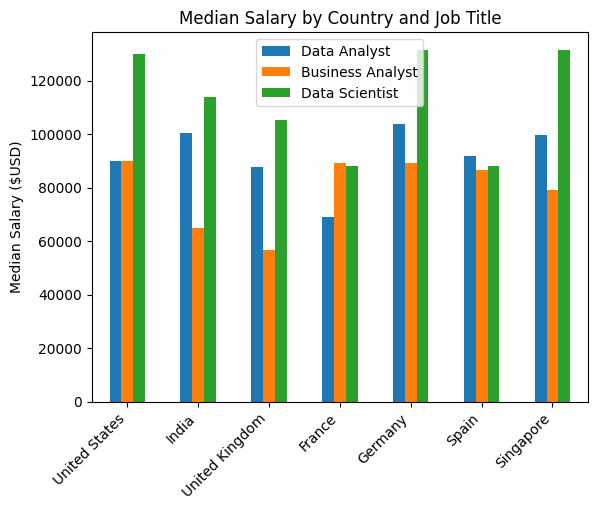

In [23]:
job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper center')
plt.show()